In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
train_dir = r'C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\MRI\Training'
test_dir = r'C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\MRI\Testing'
image_size = (128, 128)  # You can change this to a higher resolution if needed
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes (glioma, meningioma, notumor, pituitary)
])


In [6]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
178/178 [==============================] - 258s 1s/step - loss: 1.0760 - accuracy: 0.5241 - val_loss: 1.1815 - val_accuracy: 0.5289
Epoch 2/10
178/178 [==============================] - 384s 2s/step - loss: 0.8401 - accuracy: 0.6551 - val_loss: 1.9883 - val_accuracy: 0.4203
Epoch 3/10
178/178 [==============================] - 129s 726ms/step - loss: 0.7348 - accuracy: 0.7076 - val_loss: 0.8772 - val_accuracy: 0.6656
Epoch 4/10
178/178 [==============================] - 132s 739ms/step - loss: 0.6890 - accuracy: 0.7287 - val_loss: 1.0798 - val_accuracy: 0.6148
Epoch 5/10
178/178 [==============================] - 132s 739ms/step - loss: 0.6619 - accuracy: 0.7431 - val_loss: 1.3994 - val_accuracy: 0.5453
Epoch 6/10
178/178 [==============================] - 132s 742ms/step - loss: 0.6150 - accuracy: 0.7565 - val_loss: 0.8776 - val_accuracy: 0.7000
Epoch 7/10
178/178 [==============================] - 132s 738ms/step - loss: 0.5788 - accuracy: 0.7775 - val_loss: 1.0818 - val_a

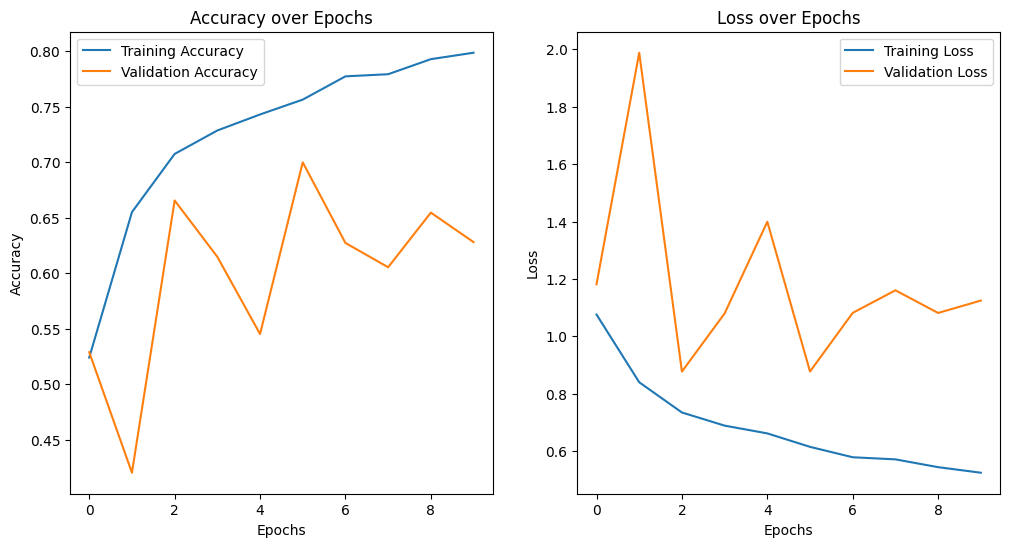

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

41/41 [==============================] - 44s 1s/step - loss: 1.1327 - accuracy: 0.6262
Test Accuracy: 0.626239538192749
Test Loss: 1.1326589584350586


In [12]:
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size)
predictions = model.predict(test_generator, steps=None)



41/41 [==============================] - 32s 752ms/step


In [13]:
predicted_classes = np.argmax(predictions, axis=1)

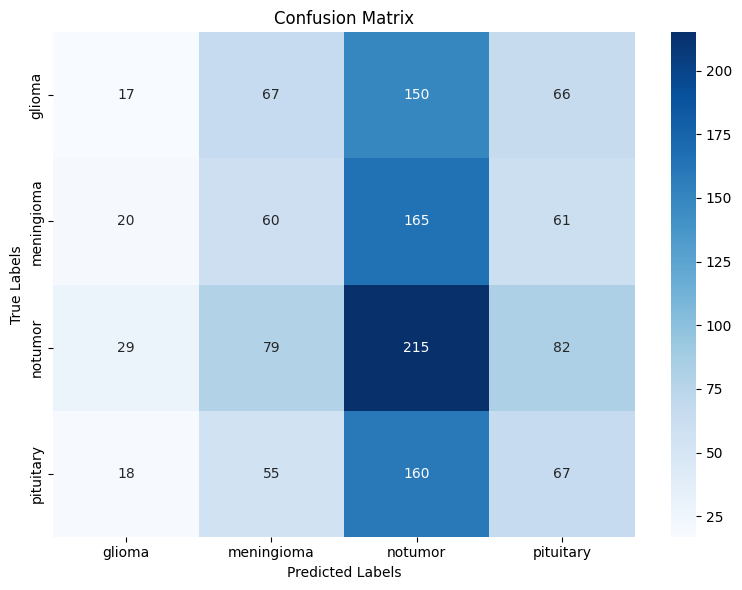

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


In [17]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.20      0.06      0.09       300
  meningioma       0.23      0.20      0.21       306
     notumor       0.31      0.53      0.39       405
   pituitary       0.24      0.22      0.23       300

    accuracy                           0.27      1311
   macro avg       0.25      0.25      0.23      1311
weighted avg       0.25      0.27      0.24      1311



In [26]:
print("Class Indices:", test_generator.class_indices)


Class Indices: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [27]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 5712 images belonging to 4 classes.


In [28]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels),
                                     y=labels)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 1.080999242997729, 1: 1.0664675130694548, 2: 0.8952978056426333, 3: 0.9800960878517502}


In [34]:
def predict_single_image(img_path, model, class_indices, image_size=(128, 128)):
    from tensorflow.keras.preprocessing import image
    import matplotlib.pyplot as plt
    import numpy as np

    # Load the image from the given path and display it
    img = image.load_img(img_path, target_size=image_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Map class index to class name
    index_to_class = {v: k for k, v in class_indices.items()}
    predicted_class = index_to_class[predicted_index]

    # Display result
    print(f"🧠 Predicted Tumor Type: {predicted_class}")
    print(f"✅ Confidence: {confidence:.2f}%")


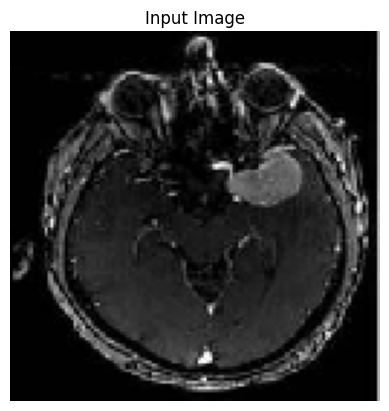

1/1 [==============================] - 0s 232ms/step
🧠 Predicted Tumor Type: notumor
✅ Confidence: 100.00%


In [35]:
predict_single_image(r"C:\Users\anany\OneDrive\Desktop\Research Paper Publish\model\MRI\Testing\meningioma\Te-me_0011.jpg", model, test_generator.class_indices)
